# Plot the results of Toy simulate results

## Library imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scvelo as scv
from scipy.stats import ttest_ind, wilcoxon
import mplscience

from paths import FIG_DIR, DATA_DIR

In [2]:
import os

## General setting

In [3]:
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis")
plt.rcParams["svg.fonttype"] = "none"

In [4]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    os.makedirs(FIG_DIR / "simulation" / "toy_GRN", exist_ok=True)

SAVE_DATASETS = True
if SAVE_DATASETS:
    os.makedirs(DATA_DIR / "simulation" / "toy_GRN", exist_ok=True)

In [5]:
plt.rcParams["svg.fonttype"] = "none"
mpl.rcParams.update({"font.size": 14})

## Function definations

In [6]:
def get_significance(pvalue):
    if pvalue < 0.001:
        return "***"
    elif pvalue < 0.01:
        return "**"
    elif pvalue < 0.1:
        return "*"
    else:
        return "n.s."


def add_significance2(ax, bottom: int, top: int, significance: str, level: int = 0, **kwargs):
    bracket_level = kwargs.pop("bracket_level", 1)
    bracket_height = kwargs.pop("bracket_height", 0.02)
    text_height = kwargs.pop("text_height", 0.01)

    left, right = ax.get_xlim()
    x_axis_range = right - left

    bracket_level = (x_axis_range * 0.07 * level) + right * bracket_level
    bracket_height = bracket_level - (x_axis_range * bracket_height)

    ax.plot([bracket_height, bracket_level, bracket_level, bracket_height], [bottom, bottom, top, top], **kwargs)

    ax.text(
        bracket_level + (x_axis_range * text_height),
        (bottom + top) * 0.5,
        significance,
        va="center",
        ha="left",
        c="k",
        rotation=90,
    )

## Import datasets

### latent time correlation benchmark

In [7]:
address = DATA_DIR / "simulation" / "toy_GRN" / "latent_time_benchmark_result.csv"
dat = pd.read_csv(address, index_col=0)

In [8]:
dat

,Time,Model
0,0.969058,RegVelo
1,0.981798,RegVelo
2,0.693562,RegVelo
3,0.761773,RegVelo
4,0.788215,RegVelo
...,...,...
395,-0.027893,Diffusion pseudotime
396,0.022764,Diffusion pseudotime
397,-0.006341,Diffusion pseudotime
398,-0.078904,Diffusion pseudotime


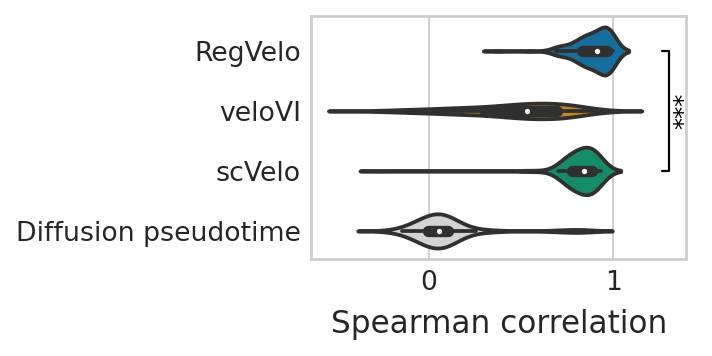

In [9]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 2))
    # Set font size for all elements
    colors = sns.color_palette("colorblind", n_colors=3)
    colors = colors + ["lightgrey"] * 1

    sns.violinplot(y="Model", x="Time", data=dat, palette=colors, ax=ax)

    ttest_res = ttest_ind(
        dat.loc[dat.loc[:, "Model"] == "RegVelo", "Time"],
        dat.loc[dat.loc[:, "Model"] == "scVelo", "Time"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(ttest_res.pvalue)
    add_significance2(
        ax=ax,
        bottom=0,
        top=2,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
    )

    plt.ylabel("")
    plt.xlabel("Spearman correlation")

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "simulation" / "toy_GRN" / "latent_time.svg", format="svg", transparent=True, bbox_inches="tight"
        )

### GRN benchmark

In [10]:
address = DATA_DIR / "simulation" / "toy_GRN" / "GRN_benchmark_result.csv"
dat = pd.read_csv(address, index_col=0)

In [11]:
dat

,GRN,Model
0,0.835,RegVelo
1,0.630,RegVelo
2,0.605,RegVelo
3,0.645,RegVelo
4,0.695,RegVelo
...,...,...
395,0.465,CellOracle
396,0.645,CellOracle
397,0.520,CellOracle
398,0.510,CellOracle


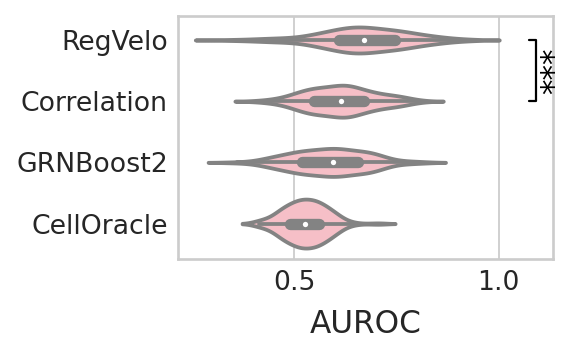

In [12]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 2))

    mpl.rcParams.update({"font.size": 14})

    # Then, create the grouped boxplot
    sns.violinplot(y="Model", x="GRN", data=dat, color="lightpink", ax=ax)

    ttest_res = ttest_ind(
        dat.loc[dat.loc[:, "Model"] == "RegVelo", "GRN"],
        dat.loc[dat.loc[:, "Model"] == "Correlation", "GRN"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(ttest_res.pvalue)
    add_significance2(
        ax=ax,
        bottom=0,
        top=1,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
    )

    plt.ylabel("")
    plt.xlabel("AUROC")

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "simulation" / "toy_GRN" / "GRN_benchmark.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

### Velocity correlation

In [13]:
address = DATA_DIR / "simulation" / "toy_GRN" / "velocity_benchmark.csv"
dat = pd.read_csv(address, index_col=0)

In [14]:
velo_rgv = dat["RegVelo"]
velo_velovi = dat["veloVI"]
velo_scv = dat["scVelo"]

In [15]:
dat = pd.DataFrame(
    {
        "Velo_cor": np.array(velo_rgv).tolist() + np.array(velo_velovi).tolist() + np.array(velo_scv).tolist(),
        "Model": ["RegVelo"] * 100 + ["veloVI"] * 100 + ["scVelo"] * 100,
    }
)

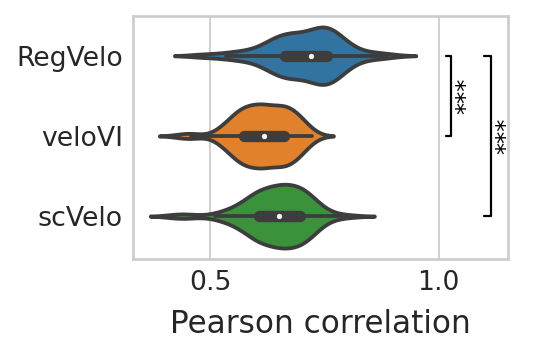

In [16]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 2))
    # pal = {"RegVelo":"#f3e1eb","veloVI":"#b5bbe3","scVelo":"#0fcfc0"}
    sns.violinplot(data=dat, y="Model", x="Velo_cor", ax=ax)
    plt.ylabel("")
    plt.xlabel("Pearson correlation")

    ttest_res = ttest_ind(
        velo_rgv,
        velo_velovi,
        alternative="greater",
    )
    significance = get_significance(ttest_res.pvalue)
    add_significance2(
        ax=ax,
        bottom=0,
        top=1,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
    )

    ttest_res = ttest_ind(
        velo_rgv,
        velo_scv,
        alternative="greater",
    )
    significance = get_significance(ttest_res.pvalue)
    add_significance2(
        ax=ax,
        bottom=0,
        top=2,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
    )

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "simulation" / "toy_GRN" / "Velocity_benchmark.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )